<h1> IMDB Movie Ratings Case Study By Simranjeet Singh</h1>

• Project Description: This Project is about Movies with their Ratings(imdb Score),actors,Directors,budget,gross.

• Approach: Begining with cleaning the DataFrame,Null values in each column is calculated in order to get the null    percentage of each column,further the rows from the columns with null percentage greater than 3% are dropped.Proceeding ahead Null values in language are Replaced with the most common language i.e. "English".Further unit of gross and budget are changed from `$` to million `$`.Duplicate values and unnecessary columns of the Dataframe are dropped, then top10 movies according to profit are extracted.Top 250 movies and top foreign language movies are also extracted.
Then Decade wise numuber of users is calculated.

• Tech-Stack Used: Jupyter Notebook, pandas, numpy, matplotlib, etc.



Google Drive Link: https://drive.google.com/file/d/1lNOKN5iKkRFtHf7qd5eYFmMWUjxjLqsF/view?usp=sharing

In [1]:
#Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the numpy and pandas packages

import numpy as np
import pandas as pd

## Task 1: Reading and Inspection

-  ### Subtask 1.1: Import and read

Import and read the movie database. Store it in a variable called `movies`.

In [3]:
movies = pd.read_csv("IMDB_Movies.csv")
movies1=movies.copy(deep=True)


-  ### Subtask 1.2: Inspect the dataframe

Inspect the dataframe's columns, shapes, variable types etc.

In [4]:
print("shape of the Dataframe is ",movies.shape)
print(movies.columns)
print(movies.dtypes)

shape of the Dataframe is  (5043, 28)
Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')
color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_nam

## Task 2: Cleaning the Data

-  ### Subtask 2.1: Inspect Null values

Find out the number of Null values in all the columns and rows. Also, find the percentage of Null values in each column. Round off the percentages upto two decimal places.

In [5]:
# Null values Column wise
movies.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          20
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [6]:
# Null Values Row wise
null_values_rows=movies.isnull().sum(axis=1)
print(null_values_rows)

0        0
1        0
2        0
3        0
4       13
        ..
5038     4
5039     5
5040     4
5041     2
5042     0
Length: 5043, dtype: int64


In [7]:
columns=[movies.columns.values]
for column in columns:
    null_values_in_a_each_column=[movies[column].isnull().sum()]

for value in null_values_in_a_each_column:
    null_percentage=(value/(movies.isnull().sum().sum()))*100

null_percentage=list(round(null_percentage,2))

null_percentage=pd.DataFrame(data=null_percentage,index=columns,columns=['Null_percentage'])
null_percentage.reset_index(inplace=True)
null_percentage.rename(columns={"level_0":"Column_name"},inplace=True)
print(null_percentage)


                  Column_name  Null_percentage
0                       color             0.70
1               director_name             3.86
2      num_critic_for_reviews             1.85
3                    duration             0.56
4     director_facebook_likes             3.86
5      actor_3_facebook_likes             0.85
6                actor_2_name             0.48
7      actor_1_facebook_likes             0.26
8                       gross            32.78
9                      genres             0.00
10               actor_1_name             0.26
11                movie_title             0.00
12            num_voted_users             0.00
13  cast_total_facebook_likes             0.00
14               actor_3_name             0.85
15       facenumber_in_poster             0.48
16              plot_keywords             5.67
17            movie_imdb_link             0.00
18       num_user_for_reviews             0.74
19                   language             0.44
20           

-  ### Subtask 2.2: Drop unecessary columns

For this assignment, you will mostly be analyzing the movies with respect to the ratings, gross collection, popularity of movies, etc. So many of the columns in this dataframe are not required. So it is advised to drop the following columns.
-  color
-  director_facebook_likes
-  actor_1_facebook_likes
-  actor_2_facebook_likes
-  actor_3_facebook_likes
-  actor_2_name
-  cast_total_facebook_likes
-  actor_3_name
-  duration
-  facenumber_in_poster
-  content_rating
-  country
-  movie_imdb_link
-  aspect_ratio
-  plot_keywords

In [8]:
# Removing Un-Necessary columns
movies.drop(columns=['color','director_facebook_likes','actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes','actor_2_name','cast_total_facebook_likes', 'actor_3_name','duration','facenumber_in_poster','content_rating','country','movie_imdb_link','aspect_ratio','plot_keywords',],inplace=True)
movies

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes
0,James Cameron,723.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054,English,237000000.0,2009.0,7.9,33000
1,Gore Verbinski,302.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238,English,300000000.0,2007.0,7.1,0
2,Sam Mendes,602.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994,English,245000000.0,2015.0,6.8,85000
3,Christopher Nolan,813.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701,English,250000000.0,2012.0,8.5,164000
4,Doug Walker,NaN,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,,NaN,NaN,NaN,7.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Scott Smith,1.0,NaN,Comedy|Drama,Eric Mabius,Signed Sealed Delivered,629,6,English,NaN,2013.0,7.7,84
5039,NaN,43.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,The Following,73839,359,English,NaN,NaN,7.5,32000
5040,Benjamin Roberds,13.0,NaN,Drama|Horror|Thriller,Eva Boehnke,A Plague So Pleasant,38,3,English,1400.0,2013.0,6.3,16
5041,Daniel Hsia,14.0,10443.0,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling,1255,9,English,NaN,2012.0,6.3,660


-  ### Subtask 2.3: Drop unecessary rows using columns with high Null percentages

Now, on inspection you might notice that some columns have large percentage (greater than 5%) of Null values. Drop all the rows which have Null values for such columns.

In [9]:
# Dropping the rows for columns with null Percentage greater than 3
columns1=movies.columns.values
most_null_percentage_columns=null_percentage.loc[null_percentage["Null_percentage"]> 3]
most_null_percentage_columns=list(most_null_percentage_columns["Column_name"])
columns1=movies.columns.values
most_null_percentage_columns1=[]
for column in most_null_percentage_columns:
    if column in columns1:
        most_null_percentage_columns1.append(str(column))
        
    else:
        pass
print(most_null_percentage_columns1)
movies.dropna(axis=0,inplace=True,subset=most_null_percentage_columns1)


['director_name', 'gross', 'budget', 'title_year']


-  ### Subtask 2.4: Fill NaN values

You might notice that the `language` column has some NaN values. Here, on inspection, you will see that it is safe to replace all the missing values with `'English'`.

In [10]:
print("Null Values in Language are :" , movies["language"].isnull().sum())
print(movies["language"].value_counts())
# Since Majority of the values are English it is Safe to replace nan values in language with English
movies["language"].fillna("ENGLISH",inplace=True)
print("Null Values in Language are :" , movies["language"].isnull().sum())


Null Values in Language are : 3
English       3707
French          37
Spanish         26
Mandarin        15
German          13
Japanese        12
Hindi           10
Cantonese        8
Italian          7
Korean           5
Portuguese       5
Norwegian        4
Danish           3
Dutch            3
Hebrew           3
Thai             3
Persian          3
Indonesian       2
Aboriginal       2
Dari             2
Telugu           1
Russian          1
Aramaic          1
Swedish          1
Mongolian        1
Maya             1
Bosnian          1
Dzongkha         1
Arabic           1
Icelandic        1
Romanian         1
Vietnamese       1
Hungarian        1
Filipino         1
Czech            1
Zulu             1
Kazakh           1
None             1
Name: language, dtype: int64
Null Values in Language are : 0


-  ### Subtask 2.5: Check the number of retained rows

You might notice that two of the columns viz. `num_critic_for_reviews` and `actor_1_name` have small percentages of NaN values left. You can let these columns as it is for now. Check the number and percentage of the rows retained after completing all the tasks above.

In [11]:
columns=[movies.columns.values]
for column in columns:
    null_values_in_a_each_column=[movies[column].isnull().sum()]

for value in null_values_in_a_each_column:
    null_percentage=(value/(movies1.isnull().sum().sum()))*100

null_percentage=list(round(null_percentage,2))

null_percentage=pd.DataFrame(data=null_percentage,index=columns,columns=['Null_percentage'])
null_percentage.reset_index(inplace=True)
null_percentage.rename(columns={"level_0":"Column_name"},inplace=True)
print(null_percentage)

               Column_name  Null_percentage
0            director_name             0.00
1   num_critic_for_reviews             0.04
2                    gross             0.00
3                   genres             0.00
4             actor_1_name             0.11
5              movie_title             0.00
6          num_voted_users             0.00
7     num_user_for_reviews             0.00
8                 language             0.00
9                   budget             0.00
10              title_year             0.00
11              imdb_score             0.00
12    movie_facebook_likes             0.00


In [12]:
rows_before_cleaning=len(movies1)
rows_retained=len(movies)
rows_retained_percentage=(rows_retained/rows_before_cleaning)*100
print("Rows Before Cleaning :",rows_before_cleaning)
print("Rows After Cleaning :",rows_retained)
print("Row Retained Percentage",rows_retained_percentage)

Rows Before Cleaning : 5043
Rows After Cleaning : 3891
Row Retained Percentage 77.15645449137418


**Checkpoint 1:** You might have noticed that we still have around `77%` of the rows!

## Task 3: Data Analysis

-  ### Subtask 3.1: Change the unit of columns

Convert the unit of the `budget` and `gross` columns from `$` to `million $`.

In [13]:
# Write your code for unit conversion here
movies["budget"]=movies["budget"]/1000000
movies["gross"]=movies["gross"]/1000000


-  ### Subtask 3.2: Find the movies with highest profit

    1. Create a new column called `profit` which contains the difference of the two columns: `gross` and `budget`.
    2. Sort the dataframe using the `profit` column as reference.
    3. Plot `profit` (y-axis) vs `budget` (x- axis) and observe the outliers using the appropriate chart type.
    4. Extract the top ten profiting movies in descending order and store them in a new dataframe - `top10`

In [14]:
# Write your code for creating the profit column here
movies["Profit"]=movies["gross"]-movies['budget']
movies

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,Profit
0,James Cameron,723.0,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054,English,237.0000,2009.0,7.9,33000,523.505847
1,Gore Verbinski,302.0,309.404152,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238,English,300.0000,2007.0,7.1,0,9.404152
2,Sam Mendes,602.0,200.074175,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994,English,245.0000,2015.0,6.8,85000,-44.925825
3,Christopher Nolan,813.0,448.130642,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701,English,250.0000,2012.0,8.5,164000,198.130642
5,Andrew Stanton,462.0,73.058679,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,738,English,263.7000,2012.0,6.6,24000,-190.641321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Shane Carruth,143.0,0.424760,Drama|Sci-Fi|Thriller,Shane Carruth,Primer,72639,371,English,0.0070,2004.0,7.0,19000,0.417760
5034,Neill Dela Llana,35.0,0.070071,Thriller,Ian Gamazon,Cavite,589,35,English,0.0070,2005.0,6.3,74,0.063071
5035,Robert Rodriguez,56.0,2.040920,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,52055,130,Spanish,0.0070,1992.0,6.9,0,2.033920
5037,Edward Burns,14.0,0.004584,Comedy|Drama,Kerry Bishé,Newlyweds,1338,14,English,0.0090,2011.0,6.4,413,-0.004416


In [15]:
# Write your code for sorting the dataframe here
movies=movies.sort_values(by="Profit",ascending=False)

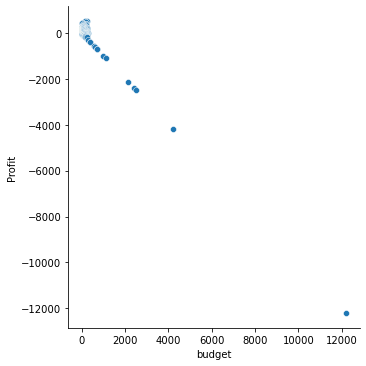

In [16]:
# Write code for profit vs budget plot here
import seaborn as sns
import matplotlib.pyplot as plt
sns.relplot(y=movies["Profit"],x=movies["budget"],kind="scatter")
plt.show()

In [17]:
top10 = movies.head(10)
top10

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,Profit
0,James Cameron,723.0,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054,English,237.0,2009.0,7.9,33000,523.505847
29,Colin Trevorrow,644.0,652.177271,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,1290,English,150.0,2015.0,7.0,150000,502.177271
26,James Cameron,315.0,658.672302,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528,English,200.0,1997.0,7.7,26000,458.672302
3024,George Lucas,282.0,460.935665,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,1470,English,11.0,1977.0,8.7,33000,449.935665
3080,Steven Spielberg,215.0,434.949459,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,515,English,10.5,1982.0,7.9,34000,424.449459
794,Joss Whedon,703.0,623.279547,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,1722,English,220.0,2012.0,8.1,123000,403.279547
17,Joss Whedon,703.0,623.279547,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,1722,English,220.0,2012.0,8.1,123000,403.279547
509,Roger Allers,186.0,422.783777,Adventure|Animation|Drama|Family|Musical,Matthew Broderick,The Lion King,644348,656,English,45.0,1994.0,8.5,17000,377.783777
240,George Lucas,320.0,474.544677,Action|Adventure|Fantasy|Sci-Fi,Natalie Portman,Star Wars: Episode I - The Phantom Menace,534658,3597,English,115.0,1999.0,6.5,13000,359.544677
66,Christopher Nolan,645.0,533.316061,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,4667,English,185.0,2008.0,9.0,37000,348.316061


-  ### Subtask 3.3: Drop duplicate values

After you found out the top 10 profiting movies, you might have noticed a duplicate value. So, it seems like the dataframe has duplicate values as well. Drop the duplicate values from the dataframe and repeat `Subtask 3.2`. Note that the same `movie_title` can be there in different languages. 

In [18]:
# Write your code for dropping duplicate values here
movies.drop_duplicates(inplace=True,keep="first")


In [19]:
# Write code for repeating subtask 2 here
top10 = movies.head(10)
top10


,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,Profit
0,James Cameron,723.0,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054,English,237.0,2009.0,7.9,33000,523.505847
29,Colin Trevorrow,644.0,652.177271,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,1290,English,150.0,2015.0,7.0,150000,502.177271
26,James Cameron,315.0,658.672302,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528,English,200.0,1997.0,7.7,26000,458.672302
3024,George Lucas,282.0,460.935665,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,1470,English,11.0,1977.0,8.7,33000,449.935665
3080,Steven Spielberg,215.0,434.949459,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,515,English,10.5,1982.0,7.9,34000,424.449459
794,Joss Whedon,703.0,623.279547,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,1722,English,220.0,2012.0,8.1,123000,403.279547
509,Roger Allers,186.0,422.783777,Adventure|Animation|Drama|Family|Musical,Matthew Broderick,The Lion King,644348,656,English,45.0,1994.0,8.5,17000,377.783777
240,George Lucas,320.0,474.544677,Action|Adventure|Fantasy|Sci-Fi,Natalie Portman,Star Wars: Episode I - The Phantom Menace,534658,3597,English,115.0,1999.0,6.5,13000,359.544677
66,Christopher Nolan,645.0,533.316061,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,4667,English,185.0,2008.0,9.0,37000,348.316061
439,Gary Ross,673.0,407.999255,Adventure|Drama|Sci-Fi|Thriller,Jennifer Lawrence,The Hunger Games,701607,1959,English,78.0,2012.0,7.3,140000,329.999255


**Checkpoint 2:** You might spot two movies directed by `James Cameron` in the list.

-  ### Subtask 3.4: Find IMDb Top 250

    1. Create a new dataframe `IMDb_Top_250` and store the top 250 movies with the highest IMDb Rating (corresponding to the column: `imdb_score`). Also make sure that for all of these movies, the `num_voted_users` is greater than 25,000.
Also add a `Rank` column containing the values 1 to 250 indicating the ranks of the corresponding films.
    2. Extract all the movies in the `IMDb_Top_250` dataframe which are not in the English language and store them in a new dataframe named `Top_Foreign_Lang_Film`.

In [20]:
movies_new=movies.sort_values(by=["imdb_score"],ascending=False)
movies_new.reset_index(drop=True,inplace=True)
movies_new["Rank"]=np.arange(1,len(movies_new)+1)
movies_new.set_index("Rank",inplace=True)
IMDb_Top_250=movies_new.head(250)
IMDb_Top_250

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,Profit
Rank,,,,,,,,,,,,,,
1,Frank Darabont,199.0,28.341469,Crime|Drama,Morgan Freeman,The Shawshank Redemption,1689764,4144,English,25.0,1994.0,9.3,108000,3.341469
2,Francis Ford Coppola,208.0,134.821952,Crime|Drama,Al Pacino,The Godfather,1155770,2238,English,6.0,1972.0,9.2,43000,128.821952
3,Christopher Nolan,645.0,533.316061,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,4667,English,185.0,2008.0,9.0,37000,348.316061
4,Francis Ford Coppola,149.0,57.300000,Crime|Drama,Robert De Niro,The Godfather: Part II,790926,650,English,13.0,1974.0,9.0,14000,44.300000
5,Peter Jackson,328.0,377.019252,Action|Adventure|Drama|Fantasy,Orlando Bloom,The Lord of the Rings: The Return of the King,1215718,3189,English,94.0,2003.0,8.9,16000,283.019252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,Don Hall,384.0,222.487711,Action|Adventure|Animation|Comedy|Drama|Family...,Damon Wayans Jr.,Big Hero 6,279093,433,English,165.0,2014.0,7.9,41000,57.487711
247,Edward Zwick,60.0,26.830000,Drama|History|War,Denzel Washington,Glory,101888,365,English,18.0,1989.0,7.9,0,8.830000
248,Philip Kaufman,80.0,21.500000,Adventure|Drama|History,Dennis Quaid,The Right Stuff,45271,170,English,27.0,1983.0,7.9,0,-5.500000


In [21]:
Top_Foreign_Lang_Film = IMDb_Top_250.loc[IMDb_Top_250["language"]!= "English"]
Top_Foreign_Lang_Film.reset_index(drop=True,inplace=True)
Top_Foreign_Lang_Film["Rank"]=np.arange(1,41)
Top_Foreign_Lang_Film

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,Profit,Rank
0,Sergio Leone,181.0,6.100000,Western,Clint Eastwood,"The Good, the Bad and the Ugly",503509,780,Italian,1.200000,1966.0,8.9,20000,4.900000,1
1,Fernando Meirelles,214.0,7.563397,Crime|Drama,Alice Braga,City of God,533200,749,Portuguese,3.300000,2002.0,8.7,28000,4.263397,2
2,Akira Kurosawa,153.0,0.269061,Action|Adventure|Drama,Takashi Shimura,Seven Samurai,229012,596,Japanese,2.000000,1954.0,8.7,11000,-1.730939,3
3,Hayao Miyazaki,246.0,10.049886,Adventure|Animation|Family|Fantasy,Bunta Sugawara,Spirited Away,417971,902,Japanese,19.000000,2001.0,8.6,28000,-8.950114,4
4,Florian Henckel von Donnersmarck,215.0,11.284657,Drama|Thriller,Sebastian Koch,The Lives of Others,259379,407,German,2.000000,2006.0,8.5,39000,9.284657,5
5,Majid Majidi,46.0,0.925402,Drama|Family,Bahare Seddiqi,Children of Heaven,27882,130,Persian,0.180000,1997.0,8.5,0,0.745402,6
6,Ron Fricke,115.0,2.601847,Documentary|Music,Collin Alfredo St. Dic,Samsara,22457,69,None,4.000000,2011.0,8.5,26000,-1.398153,7
7,Chan-wook Park,305.0,2.181290,Drama|Mystery|Thriller,Min-sik Choi,Oldboy,356181,809,Korean,3.000000,2003.0,8.4,43000,-0.818710,8
8,Jean-Pierre Jeunet,242.0,33.201661,Comedy|Romance,Mathieu Kassovitz,Amélie,534262,1314,French,77.000000,2001.0,8.4,39000,-43.798339,9
9,S.S. Rajamouli,44.0,6.498000,Action|Adventure|Drama|Fantasy|War,Tamannaah Bhatia,Baahubali: The Beginning,62756,410,Telugu,18.026148,2015.0,8.4,21000,-11.528148,10


# **Checkpoint 3:** Can you spot `Veer-Zaara` in the dataframe?

- ### Subtask 3.5: Find the best directors

    1. Group the dataframe using the `director_name` column.
    2. Find out the top 10 directors for whom the mean of `imdb_score` is the highest and store them in a new dataframe `top10director`.  Incase of a tie in IMDb score between two directors, sort them alphabetically. 

In [22]:
# Write your code for extracting the top 10 directors here
movies_director=movies.groupby("director_name")["imdb_score"].mean().sort_values(ascending=False)
top10director=movies_director.head(10)
print(top10director)

director_name
Charles Chaplin          8.600000
Tony Kaye                8.600000
Alfred Hitchcock         8.500000
Ron Fricke               8.500000
Damien Chazelle          8.500000
Majid Majidi             8.500000
Sergio Leone             8.433333
Christopher Nolan        8.425000
S.S. Rajamouli           8.400000
Marius A. Markevicius    8.400000
Name: imdb_score, dtype: float64


**Checkpoint 4:** No surprises that `Damien Chazelle` (director of Whiplash and La La Land) is in this list.

-  ### Subtask 3.6: Find popular genres

You might have noticed the `genres` column in the dataframe with all the genres of the movies seperated by a pipe (`|`). Out of all the movie genres, the first two are most significant for any film.

1. Extract the first two genres from the `genres` column and store them in two new columns: `genre_1` and `genre_2`. Some of the movies might have only one genre. In such cases, extract the single genre into both the columns, i.e. for such movies the `genre_2` will be the same as `genre_1`.
2. Group the dataframe using `genre_1` as the primary column and `genre_2` as the secondary column.
3. Find out the 5 most popular combo of genres by finding the mean of the gross values using the `gross` column and store them in a new dataframe named `PopGenre`.

In [23]:
# Write your code for extracting the first two genres of each movie here
movies.reset_index(drop=True,inplace=True)
movies_genres=movies["genres"]. str. split("|", n = 5, expand = True)
genre_1=movies_genres[0]
genre_2=movies_genres[1]
Genres=pd.DataFrame({"Genre_1":genre_1,"Genre_2":genre_2})
Genres.reset_index(drop=True,inplace=True)
Genres.fillna(method="ffill",inplace=True,axis=0)

In [24]:
movies=movies.join(Genres)

In [25]:
PopGenre = movies.groupby(["Genre_1","Genre_2"])["gross"].mean().sort_values(ascending=False)
PopGenre

Genre_1    Genre_2  
Family     Sci-Fi       434.949459
Adventure  Sci-Fi       228.627758
           Family       118.919540
           Animation    117.136090
Action     Adventure    109.330348
                           ...    
Thriller   Horror         0.070071
           Crime          0.049000
Sci-Fi     Sport          0.018195
Adventure  War            0.014873
Thriller   Drama          0.002468
Name: gross, Length: 132, dtype: float64

**Checkpoint 5:** Well, as it turns out. `Family + Sci-Fi` is the most popular combo of genres out there!

-  ### Subtask 3.7: Find the critic-favorite and audience-favorite actors

    1. Create three new dataframes namely, `Meryl_Streep`, `Leo_Caprio`, and `Brad_Pitt` which contain the movies in which the actors: 'Meryl Streep', 'Leonardo DiCaprio', and 'Brad Pitt' are the lead actors. Use only the `actor_1_name` column for extraction. Also, make sure that you use the names 'Meryl Streep', 'Leonardo DiCaprio', and 'Brad Pitt' for the said extraction.
    2. Append the rows of all these dataframes and store them in a new dataframe named `Combined`.
    3. Group the combined dataframe using the `actor_1_name` column.
    4. Find the mean of the `num_critic_for_reviews` and `num_users_for_review` and identify the actors which have the highest mean.
    5. Observe the change in number of voted users over decades using a bar chart. Create a column called `decade` which represents the decade to which every movie belongs to. For example, the  `title_year`  year 1923, 1925 should be stored as 1920s. Sort the dataframe based on the column `decade`, group it by `decade` and find the sum of users voted in each decade. Store this in a new data frame called `df_by_decade`.

In [26]:
# Write your code for creating three new dataframes here
Meryl_Streep = movies.loc[movies["actor_1_name"]=="Meryl Streep"]
Meryl_Streep

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,Profit,Genre_1,Genre_2
256,David Frankel,208.0,124.732962,Comedy|Drama|Romance,Meryl Streep,The Devil Wears Prada,286178,631,English,35.0,2006.0,6.8,0,89.732962,Comedy,Drama
449,Sydney Pollack,66.0,87.100000,Biography|Drama|Romance,Meryl Streep,Out of Africa,52339,200,English,31.0,1985.0,7.2,0,56.100000,Biography,Drama
471,Nora Ephron,252.0,94.125426,Biography|Drama|Romance,Meryl Streep,Julie & Julia,79264,277,English,40.0,2009.0,7.0,13000,54.125426,Biography,Drama
767,David Frankel,234.0,63.536011,Comedy|Drama|Romance,Meryl Streep,Hope Springs,34258,178,English,30.0,2012.0,6.3,0,33.536011,Comedy,Drama
894,Nancy Meyers,187.0,112.703470,Comedy|Drama|Romance,Meryl Streep,It's Complicated,69860,214,English,85.0,2009.0,6.6,0,27.703470,Comedy,Drama
1197,Phyllida Lloyd,331.0,29.959436,Biography|Drama|History,Meryl Streep,The Iron Lady,82327,350,English,13.0,2011.0,6.4,18000,16.959436,Biography,Drama
1207,Stephen Daldry,174.0,41.597830,Drama|Romance,Meryl Streep,The Hours,102123,660,English,25.0,2002.0,7.6,0,16.597830,Drama,Romance
1436,Robert Altman,211.0,20.338609,Comedy|Drama|Music,Meryl Streep,A Prairie Home Companion,19655,280,English,10.0,2006.0,6.8,683,10.338609,Comedy,Drama
1864,Curtis Hanson,42.0,46.815748,Action|Adventure|Crime|Thriller,Meryl Streep,The River Wild,32544,69,English,45.0,1994.0,6.3,0,1.815748,Action,Adventure
2670,Carl Franklin,64.0,23.209440,Drama,Meryl Streep,One True Thing,9283,112,English,30.0,1998.0,7.0,592,-6.790560,Drama,Thriller


In [27]:
Leo_Caprio = movies.loc[movies["actor_1_name"]=="Leonardo DiCaprio"]
Leo_Caprio

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,Profit,Genre_1,Genre_2
2,James Cameron,315.0,658.672302,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528,English,200.0,1997.0,7.7,26000,458.672302,Drama,Romance
132,Christopher Nolan,642.0,292.568851,Action|Adventure|Sci-Fi|Thriller,Leonardo DiCaprio,Inception,1468200,2803,English,160.0,2010.0,8.8,175000,132.568851,Action,Adventure
177,Steven Spielberg,194.0,164.435221,Biography|Crime|Drama,Leonardo DiCaprio,Catch Me If You Can,525801,667,English,52.0,2002.0,8.0,15000,112.435221,Biography,Crime
400,Quentin Tarantino,765.0,162.804648,Drama|Western,Leonardo DiCaprio,Django Unchained,955174,1193,English,100.0,2012.0,8.5,199000,62.804648,Drama,Western
536,Alejandro G. Iñárritu,556.0,183.635922,Adventure|Drama|Thriller|Western,Leonardo DiCaprio,The Revenant,406020,1188,English,135.0,2015.0,8.1,190000,48.635922,Adventure,Drama
546,Martin Scorsese,490.0,127.968405,Mystery|Thriller,Leonardo DiCaprio,Shutter Island,786092,964,English,80.0,2010.0,8.1,53000,47.968405,Mystery,Thriller
627,Martin Scorsese,352.0,132.373442,Crime|Drama|Thriller,Leonardo DiCaprio,The Departed,873649,2054,English,90.0,2006.0,8.5,29000,42.373442,Crime,Drama
663,Baz Luhrmann,490.0,144.812796,Drama|Romance,Leonardo DiCaprio,The Great Gatsby,362912,753,English,105.0,2013.0,7.3,115000,39.812796,Drama,Romance
664,Baz Luhrmann,490.0,144.812796,Drama|Romance,Leonardo DiCaprio,The Great Gatsby,362933,753,English,105.0,2013.0,7.3,115000,39.812796,Drama,Romance
808,Baz Luhrmann,106.0,46.338728,Drama|Romance,Leonardo DiCaprio,Romeo + Juliet,167750,506,English,14.5,1996.0,6.8,10000,31.838728,Drama,Romance


In [28]:
Brad_Pitt = movies.loc[movies["actor_1_name"]=="Brad Pitt"]
Brad_Pitt

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,Profit,Genre_1,Genre_2
230,Steven Soderbergh,186.0,183.405771,Crime|Thriller,Brad Pitt,Ocean's Eleven,402645,845,English,85.0,2001.0,7.8,0,98.405771,Crime,Thriller
380,Doug Liman,233.0,186.336103,Action|Comedy|Crime|Romance|Thriller,Brad Pitt,Mr. & Mrs. Smith,348861,798,English,120.0,2005.0,6.5,0,66.336103,Action,Comedy
590,Neil Jordan,120.0,105.264608,Drama|Fantasy|Horror,Brad Pitt,Interview with the Vampire: The Vampire Chroni...,239752,406,English,60.0,1994.0,7.6,11000,45.264608,Drama,Fantasy
1173,David Ayer,406.0,85.707116,Action|Drama|War,Brad Pitt,Fury,303185,701,English,68.0,2014.0,7.6,82000,17.707116,Action,Drama
1246,Steven Soderbergh,198.0,125.531634,Crime|Thriller,Brad Pitt,Ocean's Twelve,284852,627,English,110.0,2004.0,6.4,0,15.531634,Crime,Thriller
1475,Alejandro G. Iñárritu,285.0,34.300771,Drama,Brad Pitt,Babel,243799,908,English,25.0,2006.0,7.5,0,9.300771,Drama,Drama
2051,Andrew Dominik,414.0,14.938570,Crime|Thriller,Brad Pitt,Killing Them Softly,111625,369,English,15.0,2012.0,6.2,20000,-0.061430,Crime,Thriller
2154,Tony Scott,122.0,12.281500,Action|Crime|Drama|Romance|Thriller,Brad Pitt,True Romance,163492,460,English,13.0,1993.0,8.0,15000,-0.718500,Action,Crime
2840,Angelina Jolie Pitt,131.0,0.531009,Drama|Romance,Brad Pitt,By the Sea,7976,61,English,10.0,2015.0,5.3,0,-9.468991,Drama,Romance
3232,Terrence Malick,584.0,13.303319,Drama|Fantasy,Brad Pitt,The Tree of Life,136367,975,English,32.0,2011.0,6.7,39000,-18.696681,Drama,Fantasy


In [29]:
# Write your code for combining the three dataframes here
Combined=Meryl_Streep.append([Leo_Caprio,Brad_Pitt],ignore_index=True)
Combined.columns

Index(['director_name', 'num_critic_for_reviews', 'gross', 'genres',
       'actor_1_name', 'movie_title', 'num_voted_users',
       'num_user_for_reviews', 'language', 'budget', 'title_year',
       'imdb_score', 'movie_facebook_likes', 'Profit', 'Genre_1', 'Genre_2'],
      dtype='object')

In [30]:
# Write your code for grouping the combined dataframe here
Combined['num_user_for_reviews']=Combined['num_user_for_reviews'].astype(int)
Combined.groupby("actor_1_name")['num_critic_for_reviews', 'num_user_for_reviews'].mean().sort_values('num_critic_for_reviews',ascending=False)

,num_critic_for_reviews,num_user_for_reviews
actor_1_name,,
Leonardo DiCaprio,330.190476,914.476190
Brad Pitt,245.000000,742.352941
Meryl Streep,181.454545,297.181818


**Checkpoint 6:** `Leonardo` has aced both the lists!

In [31]:
# Write the code for calculating decade here
movies["Decade"]=movies["title_year"]//10
movies["Decade"].replace({192:"1920s",193:"1930s",194:"1940s",195:"1950s",196:"1960s",197:"1970s",198:"1980s",199:"1990s",200:"2000s",201:"2010s"},inplace=True)
movies

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,Profit,Genre_1,Genre_2,Decade
0,James Cameron,723.0,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054,English,237.000000,2009.0,7.9,33000,523.505847,Action,Adventure,2000s
1,Colin Trevorrow,644.0,652.177271,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,1290,English,150.000000,2015.0,7.0,150000,502.177271,Action,Adventure,2010s
2,James Cameron,315.0,658.672302,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528,English,200.000000,1997.0,7.7,26000,458.672302,Drama,Romance,1990s
3,George Lucas,282.0,460.935665,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,1470,English,11.000000,1977.0,8.7,33000,449.935665,Action,Adventure,1970s
4,Steven Spielberg,215.0,434.949459,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,515,English,10.500000,1982.0,7.9,34000,424.449459,Family,Sci-Fi,1980s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3851,Katsuhiro Ôtomo,105.0,0.410388,Action|Adventure|Animation|Family|Sci-Fi|Thriller,William Hootkins,Steamboy,13727,79,Japanese,2127.519898,2004.0,6.9,973,-2127.109510,Action,Adventure,2000s
3852,Hayao Miyazaki,174.0,2.298191,Adventure|Animation|Fantasy,Minnie Driver,Princess Mononoke,221552,570,Japanese,2400.000000,1997.0,8.4,11000,-2397.701809,Adventure,Animation,1990s
3853,Lajos Koltai,73.0,0.195888,Drama|Romance|War,Marcell Nagy,Fateless,5603,45,Hungarian,2500.000000,2005.0,7.1,607,-2499.804112,Drama,Romance,2000s
3854,Chan-wook Park,202.0,0.211667,Crime|Drama,Min-sik Choi,Lady Vengeance,53508,131,Korean,4200.000000,2005.0,7.7,4000,-4199.788333,Crime,Drama,2000s


In [32]:
# Write your code for creating the data frame df_by_decade here 
movies=movies.sort_values(by="Decade")
df_by_decade=movies.groupby('Decade')["num_voted_users"].sum()
df_by_decade=pd.DataFrame(df_by_decade)
df_by_decade.reset_index(inplace=True)
df_by_decade

,Decade,num_voted_users
0,1920s,116392
1,1930s,804839
2,1940s,230838
3,1950s,678336
4,1960s,2983442
5,1970s,8524102
6,1980s,19987476
7,1990s,69735679
8,2000s,170908676
9,2010s,120640994


<AxesSubplot:xlabel='Decade', ylabel='num_voted_users'>

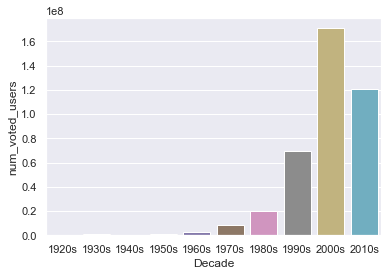

In [33]:
# Write your code for plotting number of voted users vs decade
x=df_by_decade["Decade"]
y=df_by_decade["num_voted_users"]
sns.set_theme(style="darkgrid")
sns.barplot(x,y)

Result: </br>

1: Family + Sci-fi is the most popular Genre <br/>
2: Top 10 directors are with max Profit : <br/>
Charles Chaplin, 
Tony Kaye,  
Alfred Hitchcock ,
Ron Fricke,      
Damien Chazelle,          
Majid Majidi,             
Sergio Leone,             
Christopher Nolan,        
S.S. Rajamouli,           
Marius A. Markevicius.   
3: top 250 movies in imdb_top_250 Dataframe </br>

4:Tremendous Growth in number of users voted Over the decade.

<h3> THANK YOU</h3>